# <center>CHE1147 Data Mining in Engineering</center>

## <center>Assignment 4</center>


#### <div style="text-align: right">Bowen Xu</div>
#### <div style="text-align: right">1006411786</div>    

In [1]:
import  pandas as pd 
import  numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

## 1. Chemical composition of pottery

### 1.1 Data Exploration with PCA

##### &emsp;&emsp;&emsp; - 1. Import and view the data. How many columns do you have? Which columns will you use in your PCA?

<div style='color:purple'> Last five columns (i.e. 'Al', 'Fe', 'Mg', 'Ca', 'Na') will be used in PCA because they contain numerical data.

In [2]:
df1 = pd.read_csv('Pottery.csv')
df1.head()

,Unnamed: 0,Site,Al,Fe,Mg,Ca,Na
0,1,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,2,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,3,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,4,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,5,Llanedyrn,13.8,7.06,5.34,0.20,0.20


In [3]:
print('This dataset has number of columns:',df1.shape[1])

This dataset has number of columns: 7


In [4]:
df1.columns

Index(['Unnamed: 0', 'Site', 'Al', 'Fe', 'Mg', 'Ca', 'Na'], dtype='object')

In [5]:
df = df1.drop(['Unnamed: 0', 'Site'],axis=1)

In [6]:
df.head()

,Al,Fe,Mg,Ca,Na
0,14.4,7.00,4.30,0.15,0.51
1,13.8,7.08,3.43,0.12,0.17
2,14.6,7.09,3.88,0.13,0.20
3,11.5,6.37,5.64,0.16,0.14
4,13.8,7.06,5.34,0.20,0.20


##### &emsp;&emsp;&emsp; - 2. Pre-process the data and perform PCA with 3 PCs.

In [7]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [8]:
pca = PCA(n_components=3, svd_solver='full')
pca_scores = pca.fit_transform(df_scaled)

##### &emsp;&emsp;&emsp; - 3. Plot the cumulative explained variance graph. What percent of the variance do the first 2 and 3 components describe?

<div style='color:purple'> First 2 components explain 89.7% of the variance and 3 componets explain 94.6% of it

In [9]:
np.cumsum(pca.explained_variance_ratio_)

array([0.7755594 , 0.89732137, 0.9461598 ])

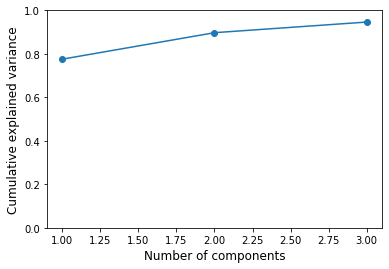

In [10]:
plt.plot(range(1,pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'-o')
plt.xlabel('Number of components', fontsize=12)
plt.ylabel('Cumulative explained variance', fontsize=12)
plt.tick_params(labelsize=10)
plt.ylim(0,1)
plt.savefig('Q1_1_3.png')
plt.show()

##### &emsp;&emsp;&emsp; - 4. Plot the scores-loadings graph for PC1-PC2. Visualize the different sites with a different colour or symbol.

In [11]:
scores_pd = pd.DataFrame(data = pca_scores
                         ,columns = ['PC1', 'PC2', 'PC3']
                         ,index = df.index)
scores_pd = pd.concat((df1.Site,scores_pd),axis=1)

scores_pd

,Site,PC1,PC2,PC3
0,Llanedyrn,-1.778026,2.289445,-0.075289
1,Llanedyrn,-0.611193,0.122065,-0.499044
2,Llanedyrn,-0.722428,0.370209,-0.207550
3,Llanedyrn,-1.417696,-0.555600,-0.557590
4,Llanedyrn,-1.486801,-0.004081,0.195248
5,Llanedyrn,-1.259044,-0.092347,-0.783259
6,Llanedyrn,-1.180703,-0.607921,-0.575010
7,Llanedyrn,-1.490385,-0.498745,-0.336582
8,Llanedyrn,-2.076010,0.000500,0.220714
9,Llanedyrn,-2.311320,-0.376341,0.800851


In [12]:
loadings_pd = pd.DataFrame(data = pca.components_.T    #Principal axes in feature space, representing the directions of maximum variance in the data
                           ,columns = ['PC1', 'PC2', 'PC3']
                           ,index = df.columns)
loadings_pd

,PC1,PC2,PC3
Al,0.445434,0.356524,0.694985
Fe,-0.478132,0.041175,-0.157338
Mg,-0.486541,-0.049607,0.158560
Ca,-0.449054,-0.344146,0.683443
Na,-0.366888,0.866197,0.002043


In [13]:
def myplot(scores,loadings,loading_labels=None,score_labels=None):
    
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]   #first pc scores
    yt = scores[:,1]   #second pc scores
    n = loadings.shape[0] #number of features = 5
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
    #plt.scatter(xs * scalex,ys * scaley, s=10)
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T,score_labels):    #-1.778026  2.289445  Llanedyrn
        plt.text(x, y, label, ha='center', size=11)
    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=10);
    plt.ylabel("PC{}".format(2), fontsize=10);
    plt.tick_params(labelsize=12)
    plt.grid()

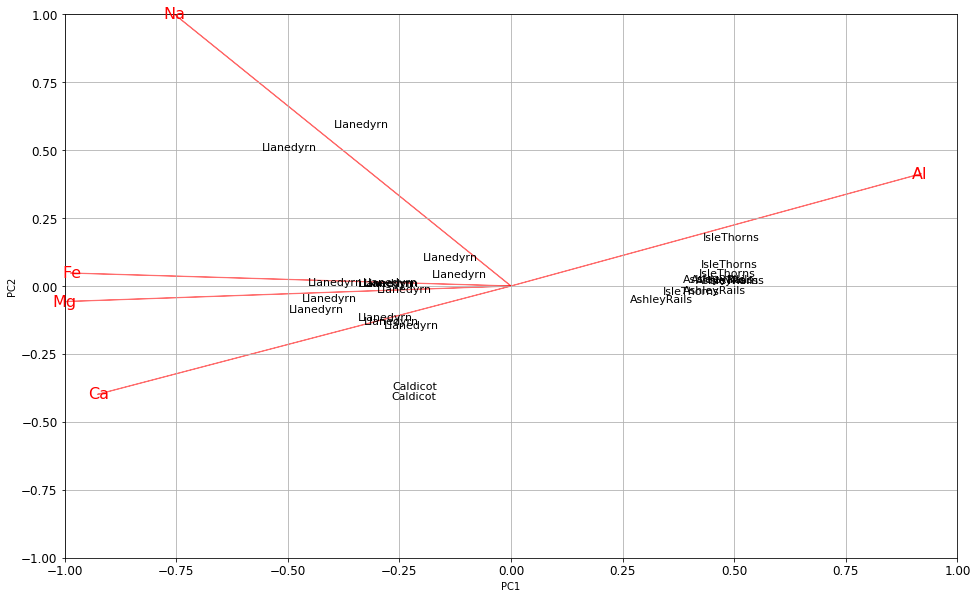

In [14]:
plt.rcParams["figure.figsize"] = [16,10]
myplot(pca_scores[:,:2],loadings_pd.iloc[:,:2],loading_labels=loadings_pd.index,score_labels=scores_pd.Site)
plt.savefig('Q1_1_4.png')
plt.show()

##### &emsp;&emsp;&emsp; - 5. How does the map of scores-loadings explains the reason that your company uses the raw material from Isle Thorns and Ashley Rails to manufacture Product B?

<div style='color:purple'> By looking at the clusters in the map, it clearly shows that the raw materials from Isle Thorns and Ashley Rails are very closed to each other which means they have very similar compositions of different elements. The main element needed for Prodcut B must be Al (Aluminum) which are different from other materials from other companies, this could the main reason my company uses raw materials from IT and AR.

##### &emsp;&emsp;&emsp; - 6. Is the raw material from Caldicot a good replacement for Llanedyrn? Yes or no and why?

<div style='color:purple'> Calcicot is NOT a good replacement for Llanedyrn. From the map, we can clearly see that Llanedyrn is mixed with four different elements such as Na, Fe, Mg and Ca, however, Caldicot is very far from the clusters and does not seem to have very close distance to these four elements which indicates the Llanedyrn and Caldicot are totally different.

##### &emsp;&emsp;&emsp; - 7. What are the biggest differences in the two big clusters? How are the two samples from the candidate Caldicot different than the Llanedyrn samples?

<div style='color:purple'> Two big clusters have very different composition of elements, one cluster on the right mainly consist of Al but very few other four elements, however, the left cluster is opposite: it has very few Al but much other four elements inside.
    
Caldicot is different from Llanedyrn sue their compositions: Caldicot may have large amount of Ca since its distance to Ca is closer than distance to Na, Fe and Mg, however, Llanedyrn has all four major components of Na, Fe, Mg and Ca which make these two sources very different.

##### &emsp;&emsp;&emsp; - 8. Confirm the answers by producing the boxplot of the 5 variables grouped by the site of the raw material shown below.

In [15]:
elements = ['Al', 'Fe', 'Mg', 'Ca', 'Na']

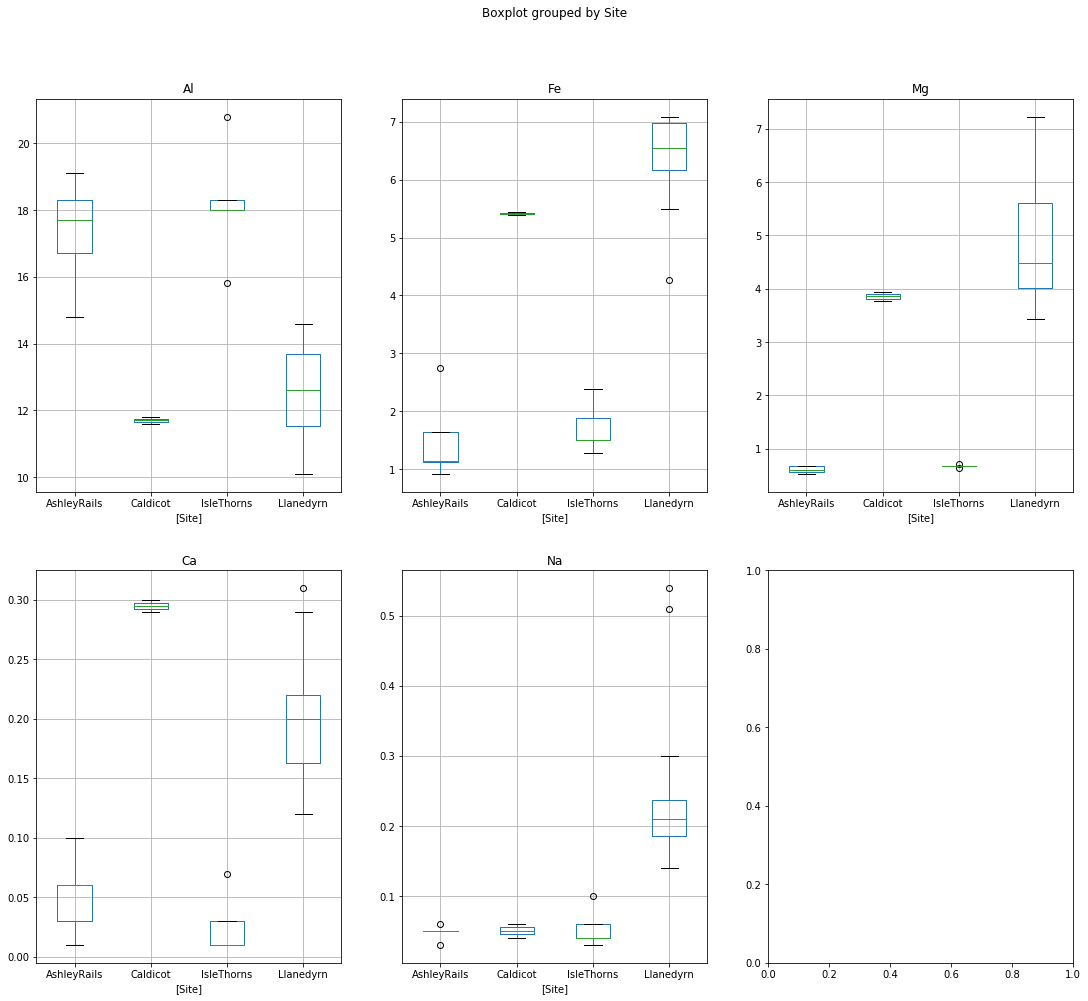

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(18,16))
for i in range(len(elements)):
    if i < 3:
        df1[['Site',elements[i]]].boxplot(by='Site',ax=axes[0,i])
    else:
        df1[['Site',elements[i]]].boxplot(by='Site',ax=axes[1,i-3])

## 2. Batch Data Analysis

### 2.1 Build a Batch Statistical Process Control model

##### &emsp;&emsp;&emsp; - 1. Import the data from ’bakers yeast reference batches.xlsx’. Identify how many batches are in the data. What is the duration of each batch and how many data points are there per batch? How many variables are measured (including time)?

In [17]:
df = pd.read_excel('bakers_yeast_reference_batches.xlsx')
df.head()

,Unnamed: 0,Primary ID,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,249,250,bb,0.000000,0.05059,31.9580,212.328,6.16453,1382.19,43.4194,5.85607
1,250,251,bb,0.166667,0.04930,31.5303,835.476,29.78270,2084.42,43.4853,5.34603
2,251,252,bb,0.333333,0.04973,30.8220,910.155,32.50710,2266.47,43.5628,5.18718
3,252,253,bb,0.500000,0.04915,30.1617,985.011,36.37100,2446.84,43.6002,5.18043
4,253,254,bb,0.666667,0.04744,29.8891,1052.450,39.26990,2636.96,43.6572,5.18145


In [18]:
print('Number of batches is:',len(df.BatchID.unique()))

Number of batches is: 16


In [19]:
#duration for each batch
df.groupby('BatchID')['Time'].max()

BatchID
Ma    13.6667
Na    13.6667
Ta    13.6667
Va    13.6667
Xa    13.6667
bb    13.6667
cb    13.6667
db    13.6667
eb    13.6667
fb    13.6667
gb    13.6667
hb    13.6667
ib    13.6667
jb    13.6667
kb    13.6667
lb    13.6667
Name: Time, dtype: float64

In [20]:
#data points per batch
df.groupby('BatchID')['Time'].count()

BatchID
Ma    83
Na    83
Ta    83
Va    83
Xa    83
bb    83
cb    83
db    83
eb    83
fb    83
gb    83
hb    83
ib    83
jb    83
kb    83
lb    83
Name: Time, dtype: int64

<div style='color:purple'> There are 8 variables in total measured in each batch: 'Time', 'Ethanol', 'Temperature','Molasses flow', 'NH3 flow', 'Air flow', 'Level', 'pH'

##### &emsp;&emsp;&emsp; - 2. Plot the variables time-profiles in a 2x4 subplot. Inspect the graphs (don’t just plot them). Look for potential outliers. Which variables have the largest variability? Which variables are tightly controlled?

<li style='color:purple'> Potential Outliers: by observing the graphs, we can clearly see the some variables have outliers in certain batches such as 'Va', 'fb' and 'cb' batches in 'Ethanol' and 'Va' batch in 'Air flow' since those lines break the pattern in the corresponding graphs and being extremely fluctuating.
    
<li style='color:purple'> Variability: variable 'Ethanol' has the largest variabiltiy since for the time series for different batches are very fluctuating and almost no pattern could be found; variables 'Air flow' and 'PH' may have very low variability although there exists couple of outliers, the time series are overlapping with each other and pattern is consistent.

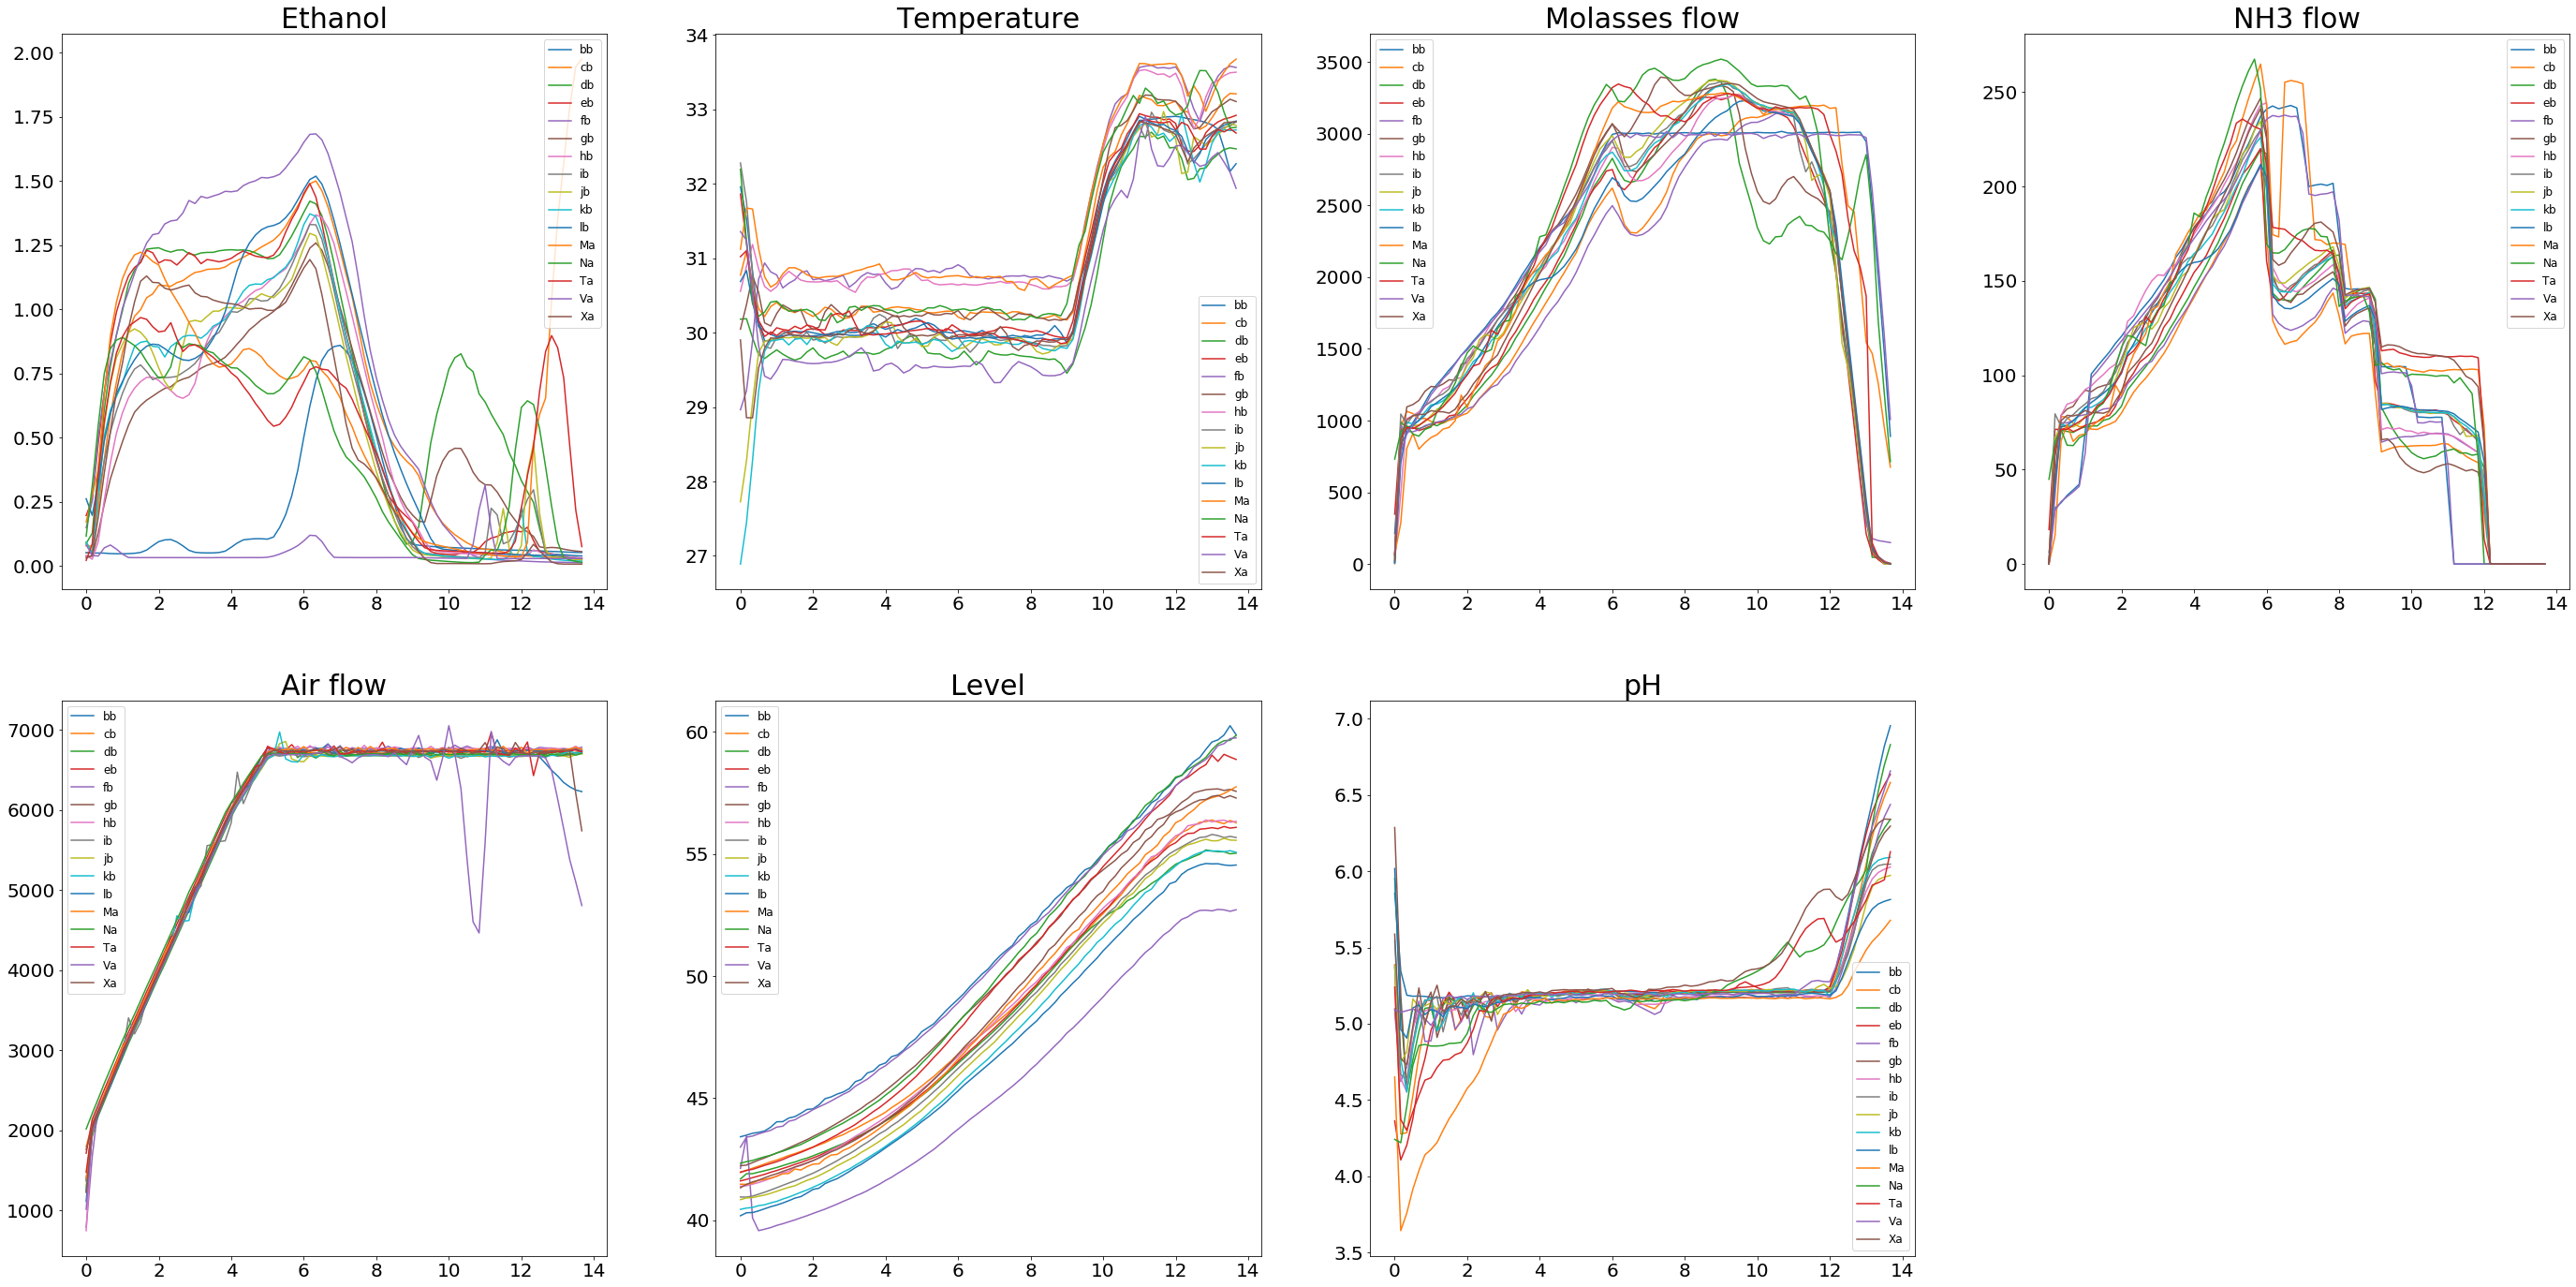

In [21]:
plt.figure(figsize=(48,24))
cols = df.columns[-7:]

for i in range(len(cols)):
    plt.subplot(2,4,i+1)
    for batch in df.BatchID.unique():
        temp = df[df.BatchID==batch]
        plt.plot(temp['Time'],temp[cols[i]],label=batch)
        plt.title(cols[i],fontsize=30)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.legend(fontsize=12)

##### &emsp;&emsp;&emsp; - 3. Select the features (including the Time column), pre-process the data and perform PCA with 5 principal components. Extract the scores and loadings.

In [22]:
df_new = df.iloc[:,-8:].copy()
scaler = StandardScaler()

df_new_scaled = scaler.fit_transform(df_new)

In [23]:
pca = PCA(n_components=5, svd_solver='full')
pca_scores = pca.fit_transform(df_new_scaled)

In [24]:
scores_pd = pd.DataFrame(data = pca_scores,columns = ['PC1', 'PC2', 'PC3','PC4','PC5'],index = df_new.index)
scores_pd

,PC1,PC2,PC3,PC4,PC5
0,-0.808176,4.508288,-0.200368,1.295502,-0.754945
1,-1.303347,3.391210,0.824346,0.666865,-0.552935
2,-1.630004,3.073121,1.085677,0.706676,-0.168488
3,-1.790453,2.816650,1.059588,0.979711,0.160562
4,-1.811100,2.636318,1.033483,1.094550,0.294213
...,...,...,...,...,...
1323,3.772295,2.368292,-1.644665,0.830572,-0.163892
1324,3.875235,2.595895,-1.942104,0.980115,-0.265168
1325,3.963794,2.665704,-2.074648,1.041445,-0.323446
1326,3.900935,2.872436,-2.046092,1.108283,-0.312934


In [25]:
loadings_pd = pd.DataFrame(data = pca.components_.T,columns = ['PC1', 'PC2', 'PC3','PC4','PC5'],index = df_new.columns)
loadings_pd

,PC1,PC2,PC3,PC4,PC5
Time,0.471425,-0.115005,-0.073487,-0.109928,0.166210
Ethanol,-0.315056,-0.164245,-0.630171,-0.587107,0.255200
Temperature,0.399243,0.203158,0.051128,-0.540846,-0.647797
Molasses flow,0.127401,-0.608623,0.366748,-0.045936,0.239382
NH3 flow,-0.254209,-0.542698,-0.115348,0.249949,-0.618487
Air flow,0.318021,-0.481637,-0.256120,-0.079962,-0.044048
Level,0.472402,-0.064508,0.060503,-0.001973,0.210803
pH,0.337563,0.132078,-0.614657,0.528890,-0.037395


##### &emsp;&emsp;&emsp; - 4. In order to plot the scores-loading plot, you need to pivot the scores BatchID with index ’Time’ (use pandas pivot table).

In [26]:
scores_pd = pd.concat((df.BatchID,df.Time,scores_pd),axis=1)
scores_pd

,BatchID,Time,PC1,PC2,PC3,PC4,PC5
0,bb,0.000000,-0.808176,4.508288,-0.200368,1.295502,-0.754945
1,bb,0.166667,-1.303347,3.391210,0.824346,0.666865,-0.552935
2,bb,0.333333,-1.630004,3.073121,1.085677,0.706676,-0.168488
3,bb,0.500000,-1.790453,2.816650,1.059588,0.979711,0.160562
4,bb,0.666667,-1.811100,2.636318,1.033483,1.094550,0.294213
...,...,...,...,...,...,...,...
1323,Xa,13.000000,3.772295,2.368292,-1.644665,0.830572,-0.163892
1324,Xa,13.166700,3.875235,2.595895,-1.942104,0.980115,-0.265168
1325,Xa,13.333300,3.963794,2.665704,-2.074648,1.041445,-0.323446
1326,Xa,13.500000,3.900935,2.872436,-2.046092,1.108283,-0.312934


In [27]:
scores_pd = pd.pivot_table(scores_pd,values=['PC1', 'PC2', 'PC3','PC4','PC5'],index='Time',columns='BatchID')
scores_pd

PC1                                                    \
BatchID          Ma        Na        Ta        Va        Xa        bb   
Time                                                                    
0.000000  -2.575226 -2.494768 -1.834810 -1.935067 -1.953438 -0.808176   
0.166667  -3.406333 -2.944182 -2.731785 -1.704701 -3.044833 -1.303347   
0.333333  -3.390333 -3.070940 -3.117042 -1.841620 -3.172201 -1.630004   
0.500000  -3.534499 -2.888284 -3.194946 -2.016330 -2.751431 -1.790453   
0.666667  -3.596972 -2.732277 -3.165646 -2.107667 -2.436144 -1.811100   
...             ...       ...       ...       ...       ...       ...   
13.000000  2.489762  4.277071  3.184812  4.033208  3.772295  4.373225   
13.166700  2.481818  4.552587  3.157697  4.097282  3.875235  4.485736   
13.333300  2.421492  4.641010  3.372776  4.055942  3.963794  4.556764   
13.500000  2.397535  4.702980  3.579729  4.048033  3.900935  4.617689   
13.666700  2.442108  4.826890  3.850841  3.985137  3.808085  4.695344   

                                                   ...       PC5            \
BatchID          cb        db        eb        fb  ...        cb        db   
Time                                               ...                       
0.000000  -1.732160 -1.483465 -2.607604 -2.574646  ... -0.132314  0.132039   
0.166667  -2.818163 -2.245863 -3.134312 -3.146375  ... -0.526101  0.060107   
0.333333  -3.018590 -3.095891 -3.340362 -3.181104  ... -0.346720  0.127723   
0.500000  -2.938017 -3.043336 -3.349177 -2.775636  ... -0.083581  0.355656   
0.666667  -2.735993 -2.909978 -3.199772 -2.511582  ...  0.060130  0.456512   
...             ...       ...       ...       ...  ...       ...       ...   
13.000000  3.610527  3.231240  3.730375  3.293611  ... -0.289543 -0.039956   
13.166700  3.812695  3.385515  3.900761  3.531415  ... -0.436381 -0.158290   
13.333300  4.008694  3.523197  4.035689  3.730366  ... -0.528557 -0.196414   
13.500000  4.187002  3.613033  4.143437  3.877819  ... -0.574028 -0.223224   
13.666700  4.289330  3.696612  4.246451  3.984240  ... -0.582936 -0.218157   

                                                                       \
BatchID          eb        fb        gb        hb        ib        jb   
Time                                                                    
0.000000  -0.617059  0.897800  0.128482  0.009076 -0.914290  1.438659   
0.166667  -0.570277  0.552050 -0.165896 -0.371143 -1.111206  0.774914   
0.333333  -0.087732  0.075650 -0.462843 -0.755104 -0.431340  0.456887   
0.500000   0.197882 -0.306487 -0.344080 -0.594513 -0.052315  0.199308   
0.666667   0.370031 -0.384769 -0.106633 -0.404393  0.123296  0.218693   
...             ...       ...       ...       ...       ...       ...   
13.000000 -0.292699 -0.656136 -0.236875 -0.491489 -0.158960 -0.126855   
13.166700 -0.372398 -0.775162 -0.341100 -0.588635 -0.269508 -0.242682   
13.333300 -0.404784 -0.839552 -0.399807 -0.637534 -0.309537 -0.286531   
13.500000 -0.430634 -0.870686 -0.438777 -0.664983 -0.323551 -0.338967   
13.666700 -0.446849 -0.863928 -0.430286 -0.667053 -0.351098 -0.322251   

                               
BatchID          kb        lb  
Time                           
0.000000   1.833015 -0.111854  
0.166667   1.236314 -0.332924  
0.333333   0.850361 -0.270976  
0.500000   0.471139 -0.038183  
0.666667   0.224946  0.038438  
...             ...       ...  
13.000000 -0.147775 -0.175886  
13.166700 -0.292980 -0.289735  
13.333300 -0.326307 -0.334636  
13.500000 -0.322784 -0.355440  
13.666700 -0.327004 -0.367125  

[83 rows x 80 columns]

##### &emsp;&emsp;&emsp; - 5. Plot the scores-loadings plot with one line per batch (this is why the pivot in the previous step was needed). The output should look similar to the plot below. You may choose a different scaling, but the trend should be the same as this graph.

In [28]:
def myplot2(scores,loadings,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xs = scores[:,0]
    ys = scores[:,1]
    n = loadings.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    xf = xs * scalex
    yf = ys * scaley
    
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
    #plt.scatter(xs * scalex,ys * scaley, s=10)
    for i in range(16):
        plt.plot(xf[i*83: (i+1)*83], yf[i*83: (i+1)*83])
    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=10);
    plt.ylabel("PC{}".format(2), fontsize=10);
    plt.tick_params(labelsize=12)
    plt.grid()

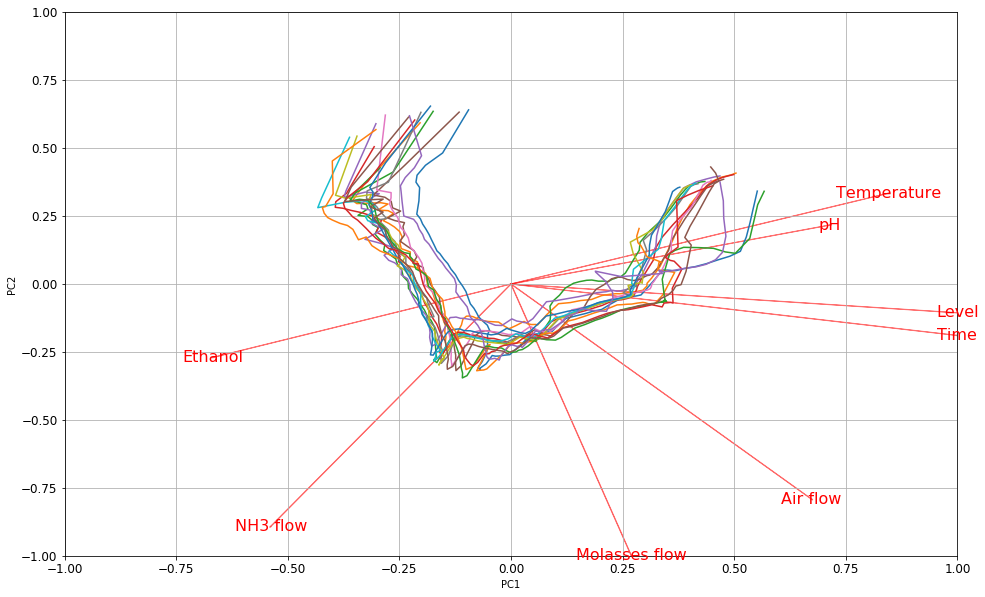

In [30]:
plt.rcParams["figure.figsize"] = [16,10]
myplot2(pca_scores[:,:2],loadings_pd.iloc[:,:2],loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.savefig('Q2_1_5.png')
plt.show()

##### &emsp;&emsp;&emsp; - 6. Explain this graph. In which quarter do the batches start and end? What happens at the kink where the direction of the lines changes? Can you tell from this graph which variables do not change in the first phase and which in the second phase?

<div style='color:purple'>By looking at the graph and original dataframe, we can conclude that the batches start in the secod quarter(top left) and end in the first quater(top right). The kink happened in the third quarter where the direction for all batches changed toward the first quarter. By observation, it clearly shows that 'Ethanol' and 'NH3 flow' arrows are very closed to the kink, therefore, the reason behind the kink could be some drastic changes in these two variables since red arrows follows the maximum-variance direction.
    
    
In the first phase(before the kink), 'Ethona' and 'NH3 flow' changed by a large amount but 'Temperature' and 'pH' variables seem to be very stable, other variables all changed by a very small extent; in the second phase, it's opposite to the first phase, 'Temperature' and 'pH' variables changed drastically but 'Ethanol' and 'NH3 flow' had no change or only a small amount.

##### &emsp;&emsp;&emsp; - 7. Plot the cumulative explained variance. How much variance do the first two principal components capture?

In [31]:
np.cumsum(pca.explained_variance_ratio_)

array([0.52860131, 0.78467377, 0.88843351, 0.95271965, 0.97625353])

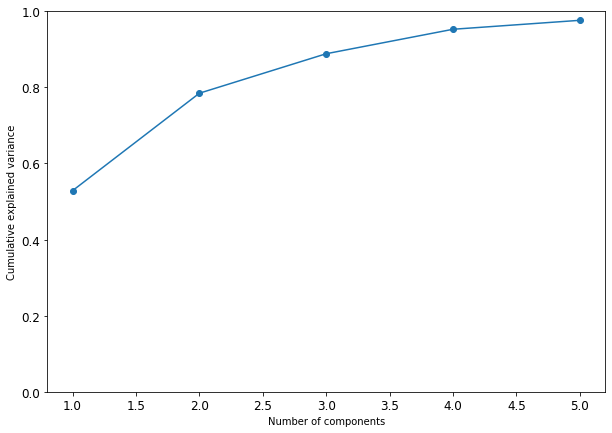

In [33]:
plt.figure(figsize=(10,7))
plt.plot(range(1,pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'-o')
plt.xlabel('Number of components', fontsize=10)
plt.ylabel('Cumulative explained variance', fontsize=10);
plt.tick_params(labelsize=12)
plt.ylim(0,1)
plt.savefig('Q2_1_7.png')
plt.show()

### 2.2 Use the model to monitor running batches

##### &emsp;&emsp;&emsp; - 1. Load the data from the file ’todays batches.xlsx’ and repeat the same procedure as in the steps 3-4 of the previous section with the exception of the PCA modeling. Here, instead of fit the data to the model and transform, you will only transform them with the model object you created in the previous section.

In [34]:
df3 = pd.read_excel('todays_batches.xlsx')
df3

,Unnamed: 0,Primary ID,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,2573,2574,Ya,0.000000,0.30350,29.0885,-0.70954,0.00356,1250.69,41.9216,4.86282
1,2574,2575,Ya,0.166667,0.41224,29.5509,-1.49002,0.00712,2040.08,41.9911,4.00324
2,2575,2576,Ya,0.333333,1.16614,29.9639,-1.63193,0.00712,2235.08,42.3624,4.05839
3,2576,2577,Ya,0.500000,2.22696,29.9746,1280.07000,82.08680,2419.08,42.8531,4.35465
4,2577,2578,Ya,0.666667,3.13590,29.9466,844.09600,74.65800,2603.53,43.2146,4.76967
...,...,...,...,...,...,...,...,...,...,...,...
161,2734,2735,Za,13.000000,0.01637,33.2882,301.55000,0.05000,6794.76,57.2191,6.38039
162,2735,2736,Za,13.166700,0.01575,33.3834,161.95900,0.04286,6820.50,57.2289,6.48979
163,2736,2737,Za,13.333300,0.01512,33.4438,75.58330,0.03214,6698.80,57.2021,6.55989
164,2737,2738,Za,13.500000,0.01444,33.4531,61.79870,0.06429,6775.14,57.0425,6.59559


In [35]:
df3_new = df3.iloc[:,-8:].copy()

df3_new_scaled = scaler.transform(df3_new)

In [36]:
pca3_scores = pca.transform(df3_new_scaled)

In [37]:
scores_pd = pd.DataFrame(data = pca3_scores,columns = ['PC1', 'PC2', 'PC3','PC4','PC5'],index = df3_new.index)
scores_pd

,PC1,PC2,PC3,PC4,PC5
0,-3.096781,3.798958,1.166746,0.602916,0.937231
1,-3.715861,3.216763,2.529801,-1.183846,0.839431
2,-3.928722,2.972255,1.411527,-2.217525,1.037556
3,-4.362027,1.145315,-0.230988,-2.807162,1.130690
4,-4.476710,1.268811,-2.409623,-3.259502,1.559791
...,...,...,...,...,...
161,4.177559,2.589581,-2.097027,0.924135,-0.524341
162,4.329929,2.726441,-2.361650,1.062921,-0.615614
163,4.401519,2.857172,-2.506579,1.158278,-0.667658
164,4.462603,2.853649,-2.596933,1.205385,-0.682489


In [38]:
loadings_pd = pd.DataFrame(data = pca.components_.T,columns = ['PC1', 'PC2', 'PC3','PC4','PC5'],index = df3_new.columns)
loadings_pd

,PC1,PC2,PC3,PC4,PC5
Time,0.471425,-0.115005,-0.073487,-0.109928,0.166210
Ethanol,-0.315056,-0.164245,-0.630171,-0.587107,0.255200
Temperature,0.399243,0.203158,0.051128,-0.540846,-0.647797
Molasses flow,0.127401,-0.608623,0.366748,-0.045936,0.239382
NH3 flow,-0.254209,-0.542698,-0.115348,0.249949,-0.618487
Air flow,0.318021,-0.481637,-0.256120,-0.079962,-0.044048
Level,0.472402,-0.064508,0.060503,-0.001973,0.210803
pH,0.337563,0.132078,-0.614657,0.528890,-0.037395


In [39]:
scores_pd = pd.concat((df3.BatchID,df3.Time,scores_pd),axis=1)
scores_pd

,BatchID,Time,PC1,PC2,PC3,PC4,PC5
0,Ya,0.000000,-3.096781,3.798958,1.166746,0.602916,0.937231
1,Ya,0.166667,-3.715861,3.216763,2.529801,-1.183846,0.839431
2,Ya,0.333333,-3.928722,2.972255,1.411527,-2.217525,1.037556
3,Ya,0.500000,-4.362027,1.145315,-0.230988,-2.807162,1.130690
4,Ya,0.666667,-4.476710,1.268811,-2.409623,-3.259502,1.559791
...,...,...,...,...,...,...,...
161,Za,13.000000,4.177559,2.589581,-2.097027,0.924135,-0.524341
162,Za,13.166700,4.329929,2.726441,-2.361650,1.062921,-0.615614
163,Za,13.333300,4.401519,2.857172,-2.506579,1.158278,-0.667658
164,Za,13.500000,4.462603,2.853649,-2.596933,1.205385,-0.682489


In [40]:
scores_pd = pd.pivot_table(scores_pd,values=['PC1', 'PC2', 'PC3','PC4','PC5'],index='Time',columns='BatchID')
scores_pd

PC1                 PC2                 PC3            \
BatchID          Ya        Za        Ya        Za        Ya        Za   
Time                                                                    
0.000000  -3.096781 -0.660359  3.798958  4.613764  1.166746 -1.802298   
0.166667  -3.715861 -2.032155  3.216763  2.849667  2.529801  0.423385   
0.333333  -3.928722 -2.734359  2.972255  2.229773  1.411527  1.511814   
0.500000  -4.362027 -2.523621  1.145315  2.247428 -0.230988  0.916732   
0.666667  -4.476710 -2.356751  1.268811  2.592231 -2.409623  0.100159   
...             ...       ...       ...       ...       ...       ...   
13.000000  1.684309  4.177559  1.398034  2.589581 -1.259476 -2.097027   
13.166700  1.770673  4.329929  1.426290  2.726441 -1.244740 -2.361650   
13.333300  1.869276  4.401519  1.470466  2.857172 -1.198562 -2.506579   
13.500000  1.932977  4.462603  1.699221  2.853649 -1.276991 -2.596933   
13.666700  1.646827  4.510675  2.394997  2.868612 -1.234926 -2.633580   

                PC4                 PC5            
BatchID          Ya        Za        Ya        Za  
Time                                               
0.000000   0.602916  2.854773  0.937231 -0.030840  
0.166667  -1.183846  1.492080  0.839431  0.011713  
0.333333  -2.217525 -0.031252  1.037556 -0.072634  
0.500000  -2.807162 -0.437946  1.130690 -0.224712  
0.666667  -3.259502 -0.325745  1.559791 -0.049787  
...             ...       ...       ...       ...  
13.000000 -2.095856  0.924135  0.405520 -0.524341  
13.166700 -1.915758  1.062921  0.421113 -0.615614  
13.333300 -1.773398  1.158278  0.404415 -0.667658  
13.500000 -1.577216  1.205385  0.316969 -0.682489  
13.666700 -1.173403  1.236215  0.343897 -0.672140  

[83 rows x 10 columns]

##### &emsp;&emsp;&emsp; - 2. Plot the same scores-loadings plot for the data in the batches you used to develop the model with solid lines. Overlay the new incoming data from the two current batches with dashed lines and two different colours to distinguish them. Also, add a legend for the two batches so that the viewer can distinguish them.

In [41]:
def myplot3(scores1, scores2, loadings, loading_labels=None, score_labels=None):
    
    # adjusting the scores to fit in (-1,1)
    xs1 = scores1[:,0]
    ys1 = scores1[:,1]
    n = loadings.shape[0]
    scalex1 = 1.0/(xs1.max() - xs1.min())
    scaley1 = 1.0/(ys1.max() - ys1.min())
    xf1 = xs1 * scalex1
    yf1 = ys1 * scaley1
    
    xs2 = scores2[:,0]
    ys2 = scores2[:,1]
    scalex2 = 1.0/(xs2.max() - xs2.min())
    scaley2 = 1.0/(ys2.max() - ys2.min())
    xf2 = xs2 * scalex2
    yf2 = ys2 * scaley2
    
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)

    for i in range(16):
        plt.plot(xf1[i*83: (i+1)*83], yf1[i*83: (i+1)*83], color = 'grey', linestyle='solid')
    
    for i in range(2):
        plt.plot(xf2[i*83: (i+1)*83], yf2[i*83: (i+1)*83], linestyle='-.', linewidth=4,label = score_labels[i])
    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)

    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.legend(loc = 'best')
    plt.grid()

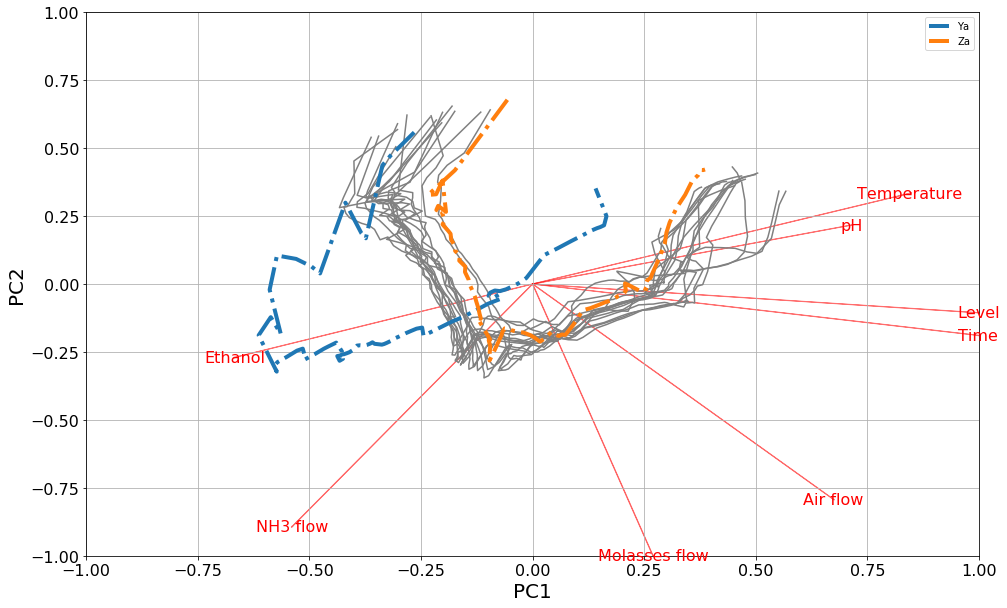

In [43]:
plt.rcParams["figure.figsize"] = [16,10]
myplot3(pca_scores[:,:2], pca3_scores[:,:2],loadings_pd.iloc[:,:2], loading_labels=loadings_pd.index, score_labels=scores_pd.columns.get_level_values(1).unique())
plt.savefig('Q2_2_2.png')
plt.show()

##### &emsp;&emsp;&emsp; - 3. Do the batches show behaviour similar to that of the reference ones or there are outliers indicating potential problems?


<div style='color:purple'> By looking at the scores-loading graph above, it clearly shows that the orange line (batch Za) has a very similar pattern as the model created in the above sections but the blue line (batch Ya) is not. Although batch Ya has the same start and end locations (in the second and first quarters, respectively), it does not follow the pattern of other batches. By observing the time-series graphs below, batch Ya has a very drastic difference in variable 'Ethanol' which corresponds to the blue line is following the direction of 'Ethanol' in second phase, furthermore, by oberving other variables, we can see that batch Ya also has very different 'Molasses flow' and 'NH3 flow' which could also be the reason for its unusual pattern.

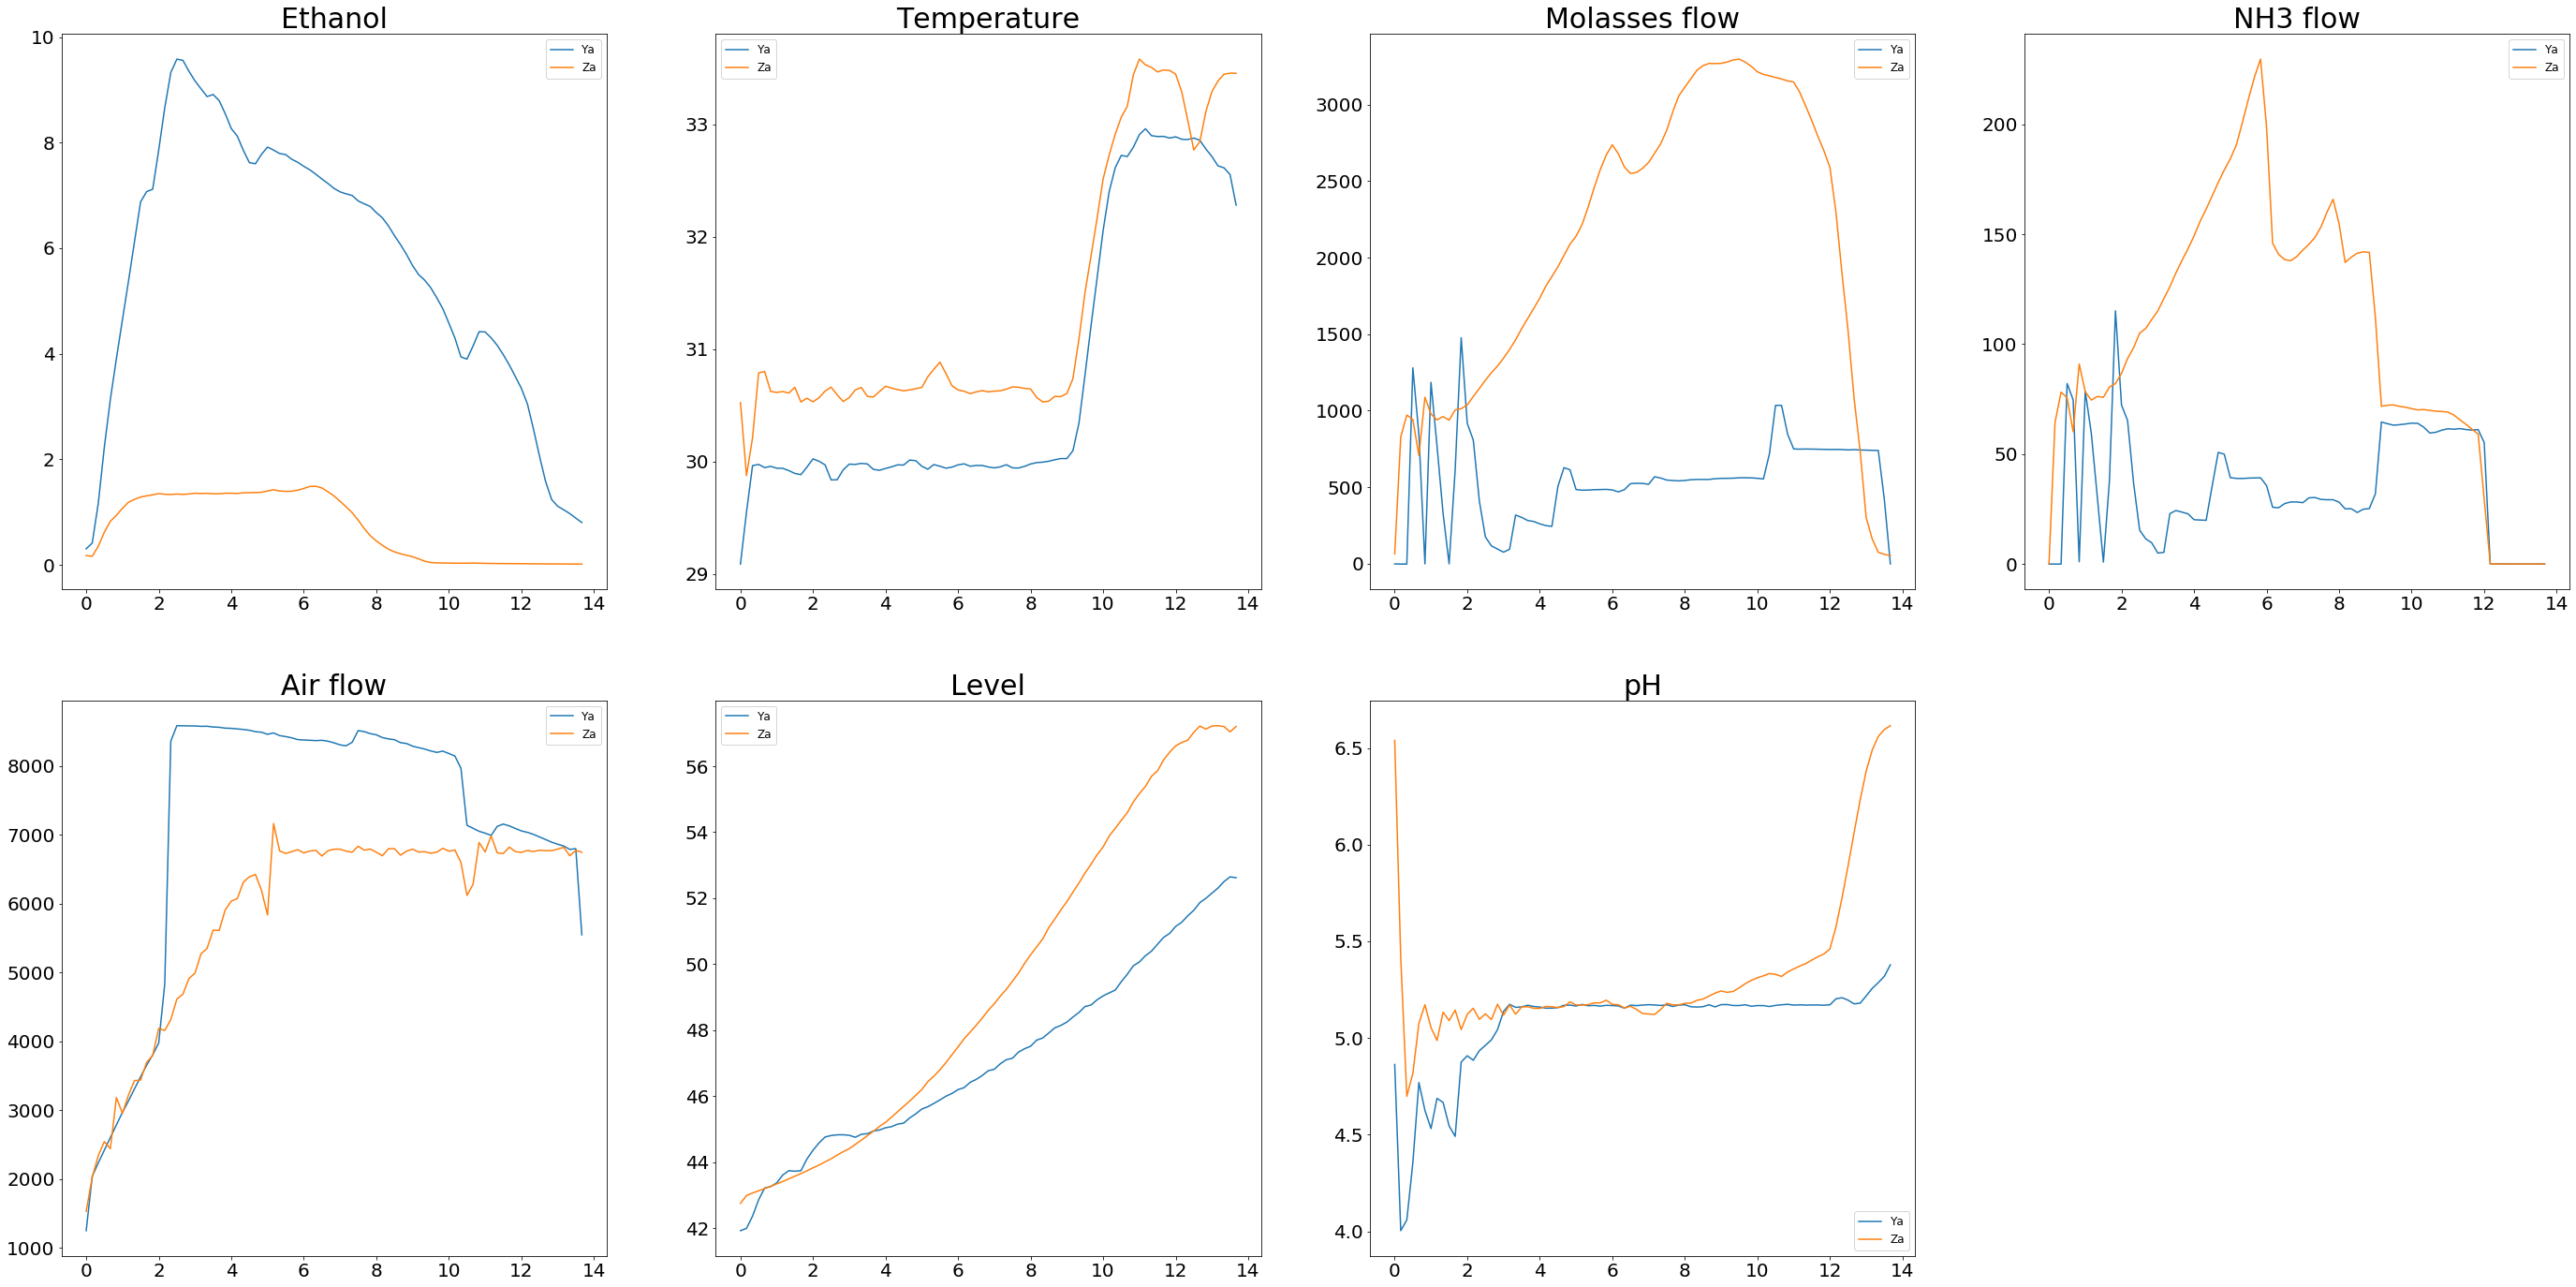

In [44]:
plt.figure(figsize=(48,24))
cols = df3.columns[-7:]

for i in range(len(cols)):
    plt.subplot(2,4,i+1)
    for batch in df3.BatchID.unique():
        temp = df3[df3.BatchID==batch]
        plt.plot(temp['Time'],temp[cols[i]],label=batch)
        plt.title(cols[i],fontsize=30)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.legend(fontsize=12)